In [18]:
import pandas as pd

cpi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/CPIAUCSL.csv')
pce = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/PCE_clean.csv')
dspi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/DSPI_cleaned.csv')
pcepi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/PCEPILFE_cleaned.csv')

In [19]:
#convert date column of each dataset to 'datetime'
cpi['date'] = pd.to_datetime(cpi['date'])
pce['date'] = pd.to_datetime(pce['date'])
dspi['date'] = pd.to_datetime(dspi['date'])
pcepi['date'] = pd.to_datetime(pcepi['date'])

In [20]:
cpi.head()

,realtime_start,date,value
0,2025-04-21,2010-01-01,217.488
1,2025-04-21,2010-02-01,217.281
2,2025-04-21,2010-03-01,217.353
3,2025-04-21,2010-04-01,217.403
4,2025-04-21,2010-05-01,217.290


In [21]:
pce.head()

,date,value
0,2010-01-01,10056.1
1,2010-02-01,10093.4
2,2010-03-01,10156.0
3,2010-04-01,10182.3
4,2010-05-01,10210.8


In [22]:
dspi.head()

,date,value
0,2010-01-01,11073.7
1,2010-02-01,11079.0
2,2010-03-01,11138.2
3,2010-04-01,11240.7
4,2010-05-01,11328.4


In [23]:
cpi.head()

,realtime_start,date,value
0,2025-04-21,2010-01-01,217.488
1,2025-04-21,2010-02-01,217.281
2,2025-04-21,2010-03-01,217.353
3,2025-04-21,2010-04-01,217.403
4,2025-04-21,2010-05-01,217.290


In [24]:
#merge into one dataframe
df = pd.merge(cpi,pce,on = 'date', how = 'inner', suffixes = ('_cpi','_pce'))
df = pd.merge(df, dspi, on ='date', how ='inner')
df.head()

,realtime_start,date,value_cpi,value_pce,value
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4


In [25]:
#find the real personal consumption expenditure adjusted with inflation
pce['value_real_pce'] = pce['value'] / (pcepi['value'] / 100)

In [26]:
df['value_real_pce'] = pce['value_real_pce']

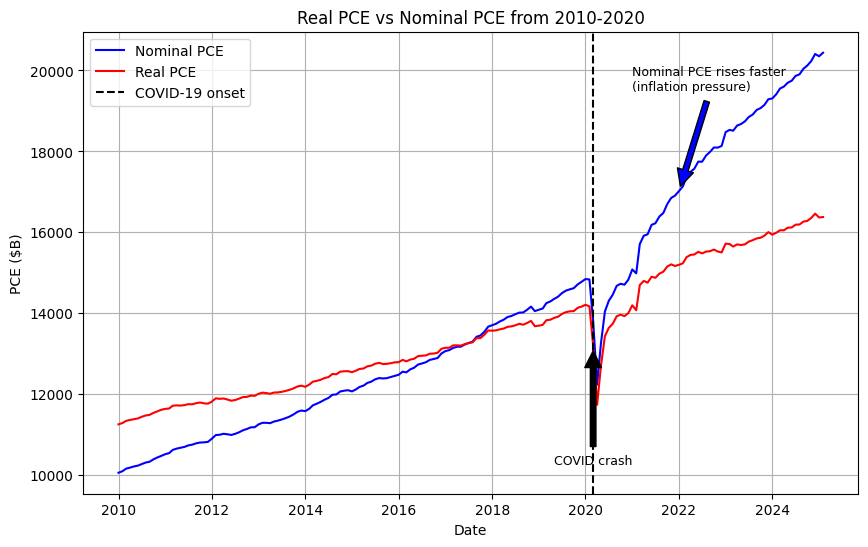

In [29]:
import matplotlib.pyplot as plt
import matplotlib_inline

plt.figure(figsize=(10,6))
plt.plot(pce['date'], pce['value'], label = 'Nominal PCE', color = 'blue')
plt.plot(pce['date'], pce['value_real_pce'], label = 'Real PCE', color = 'red')
covid_date = pd.to_datetime("2020-03-01")
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')

plt.annotate('COVID crash',
             xy = (covid_date, df.loc[df['date'] == covid_date, 'value_real_pce'].values[0]),
             xytext= (covid_date, df['value_real_pce'].min()-1000),
             arrowprops = dict(facecolor = 'black', shrink =0.05,),
             fontsize=9,
             ha='center')

plt.annotate('Nominal PCE rises faster\n(inflation pressure)', 
             xy=(pd.to_datetime('2022-01-01'), df.loc[df['date'] == pd.to_datetime('2022-01-01'), 'value_pce'].values[0]), 
             xytext=(pd.to_datetime('2021-01-01'), 19500),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=9,
             ha='left')

plt.xlabel('Date')
plt.ylabel('PCE ($B)')
plt.title('Real PCE vs Nominal PCE from 2010-2020')
plt.legend()
plt.grid()
plt.show()


From the graph above, we can easily seperate the graphs into two distint periods, before and after 2016

From 2010 to 2016, the Nominal PCE is consistently below the Real PCE. There are several reasons:
    1. Inflation was low and stable
        - if real pce always higher than nominal pce, we can safely assum that the PCEPI inflation index is less than 100, meaning the prices can be lower or close to the same with last year
        - It suggests that inflation was not outpacing consumer spending growth — a sign of strong real consumption power.
    2. Consumer purchase was strong
        - Simililary, the reason that the nominal pce can be lower than real pce is that during 2010-2016, consumers could be able to buy more using the same 1 dollar they have yesterday.
    3. Interpretation
        - From 2010–2016, inflation was relatively mild. As a result, when adjusted for inflation, consumer spending in real terms (Real PCE) exceeded the nominal figures, reflecting increased purchasing power and real growth in consumption behavior.
    
During 2016 to now:
    1. During 2016
        - In 2020, both Real and Nominal PCE dropped sharply, aligning with the onset of the COVID-19 pandemic and its disruptive impact on the economy. However, in the recovery period following 2020, both metrics rebounded — but with a key difference: Nominal PCE began to outpace Real PCE.
    2. 2016 till now
        - The increase in nominal spending was increasingly driven by rising prices rather than higher consumption volumes. In simple terms, inflation surged, and consumers were spending more dollars — not because they were buying more, but because prices themselves were higher. This post-pandemic inflationary pressure is clearly reflected in the widening gap between nominal and real consumption.

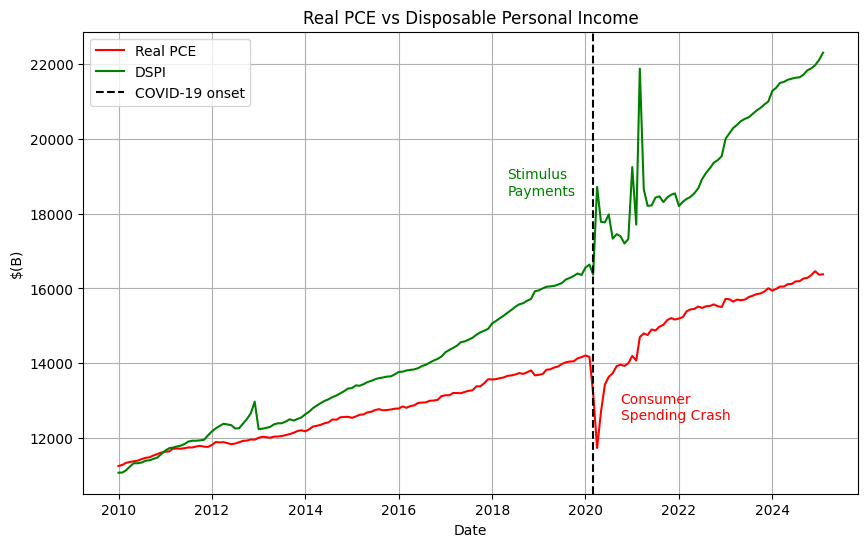

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(pce['date'], pce['value_real_pce'], label='Real PCE', color = 'red')
plt.plot(dspi['date'], dspi['value'], label='DSPI', color = 'green')
covid_date = pd.to_datetime("2020-03-01")
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')

#annotate the graph 
# After plotting the lines

# Simple text labels
plt.text(pd.to_datetime('2018-05-01'), 18500, 'Stimulus\nPayments', fontsize=10, color='green')
plt.text(pd.to_datetime('2020-10-01'), 12500, 'Consumer\nSpending Crash', fontsize=10, color='red')

plt.title("Real PCE vs Disposable Personal Income")
plt.xlabel("Date")
plt.ylabel("$(B)")
plt.legend()
plt.grid()
plt.show()




During the 2010s, when Real PCE exceeds Disposable Personal Income (DSPI), it suggests consumers were spending nearly all (or more than all) of their after-tax income. This could indicate that during 2010s, the consumers had higher consumer realiances, they also received lower saving rates or possibly still recovering from the 2008 crisis. In general, the graph suggest that the consumers spent a big portion of their disposable income.

Later years, when the gap between DSPI and real PCE are bigger and DSPI outpace the real PCE, it suggests that consumers now that have more disposble income that they are spending. There are several reasons. People are more cautios which their money and also increase in the saving behavior. 

The dramatic spikes in Disposable Personal Income (DSPI) during 2020 and 2021 are not just natural economic behavior. They’re largely the result of extraordinary government policies introduced in response to the COVID-19 pandemic. According to my research, some of the important policies such as Stimulus payments, expanded unemployment benefit and child tax credit expansions significantly help each household gained more income. While DSPI spiked, Real PCE did not rise at the same rate, suggesting a rise in savings or delayed consumption behavior, driven by uncertainty and constrained spending options.

Overall, during the early 2010s, Real PCE occasionally exceeded Disposable Personal Income (DSPI), suggesting that consumers were spending a large share — or possibly more than — their after-tax income. This reflects either low savings rates or reliance on credit.
However, in later years, DSPI consistently outpaced Real PCE, indicating a shift in behavior: either a rise in household savings, more conservative consumption, or an increase in disposable income that was not fully translated into spending. The widening gap post-2020 is especially notable and could be influenced by fiscal stimulus and changing consumer expectations in the inflationary recovery period.

In [32]:
df.head()

,realtime_start,date,value_cpi,value_pce,value,value_real_pce
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7,11252.461731
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0,11284.350334
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2,11337.478650
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7,11361.004184
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4,11380.232714


In [33]:
#create the saving rate and add to merge dataframe
df = df.rename(columns ={'value':'value_dspi','real_pci_value':'value_real_pce'})
df['saving_rate'] = (df['value_dspi'] - df['value_real_pce'])/(df['value_dspi'])
df.head()

,realtime_start,date,value_cpi,value_pce,value_dspi,value_real_pce,saving_rate
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7,11252.461731,-0.016143
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0,11284.350334,-0.018535
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2,11337.478650,-0.017891
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7,11361.004184,-0.010703
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4,11380.232714,-0.004575


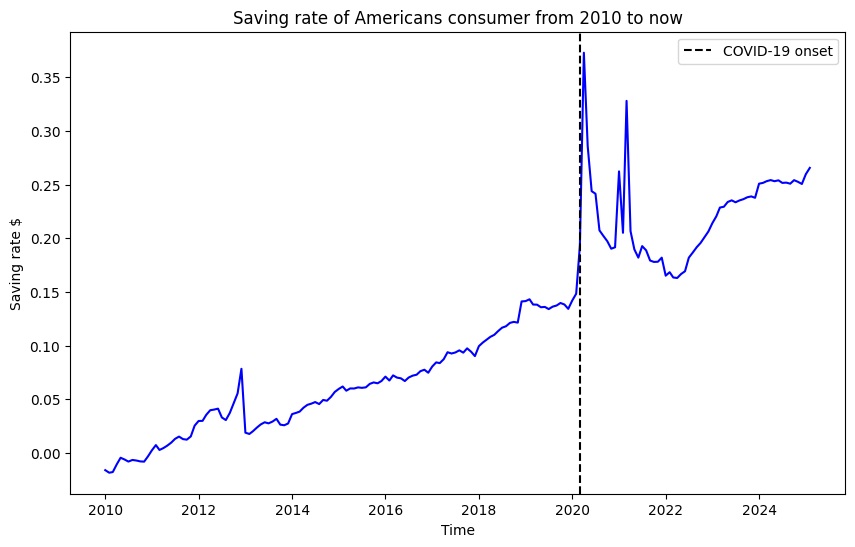

In [35]:
plt.figure(figsize = (10,6))
plt.plot(df['date'],df['saving_rate'], color = 'blue')
covid_date = pd.to_datetime("2020-03-01")
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')
plt.xlabel('Time')
plt.ylabel('Saving rate $')
plt.title('Saving rate of Americans consumer from 2010 to now')
plt.legend()
plt.show()

The following graph covering the saving rate of American consumption over the year. The saving rate measuers the proportion of disposable income, not spent on consumption. The higher the saving rates, the more people are saving.

Before covid in 2019, the saving rates was relatively stable, ranging between 0.055 to 0.15%. In other figure when we compares PCE and DPSI, the real PCE was close to or higher than DSPI, therefore, we can conclude that the consumers were spending most of their disposable income. The economic conditions were stabled with low inflation and steady growth.

The 2020 marked the year that we got hit with the pandemic. Because of the quarantine as well as the policiesm the saving rate spikes up to 35%, which means that the consumers could not spend their money and saved the most money out of it.

After the peak pandemic, the saving rates gradually falls back down but still remains higer than pre-Covid period. The reasons that led to the phenomenon is that the consumers still had leftovers savbings from stimulus. In addition, the spending started to recover but rising prices due to inflation made people cautios. This is also align with what we saw earlier in the graph that compare PCE and real PCE. The nominal PCE outpaced real PCE post-Covid, the prices were rising faster than the customer pruchasing power.

In [36]:
df['value_pcepi'] = pcepi['value']
df.head()

,realtime_start,date,value_cpi,value_pce,value_dspi,value_real_pce,saving_rate,value_pcepi
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7,11252.461731,-0.016143,89.368
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0,11284.350334,-0.018535,89.446
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2,11337.478650,-0.017891,89.579
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7,11361.004184,-0.010703,89.625
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4,11380.232714,-0.004575,89.724


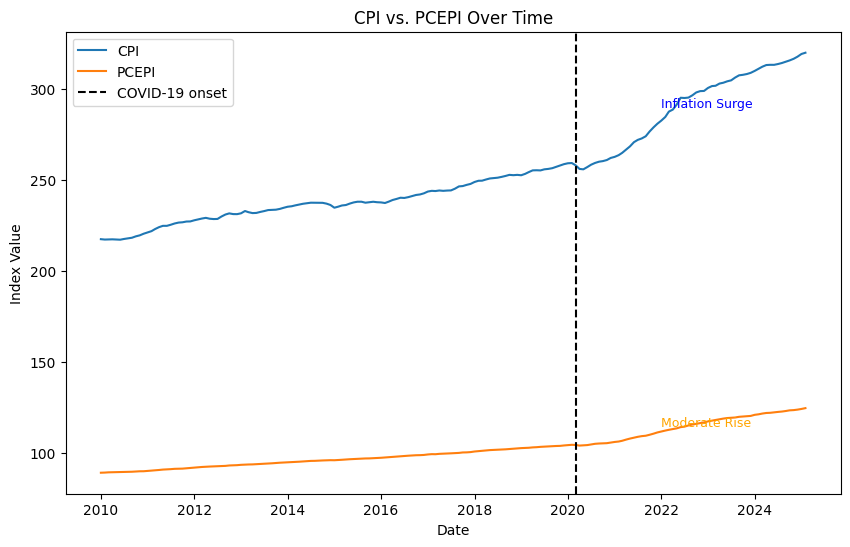

In [37]:
# Plotting CPI and PCEPI over time
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['value_cpi'], label='CPI')
plt.plot(df['date'], df['value_pcepi'], label='PCEPI')

#annotate the covid period and where the inflation happen
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')
plt.text(pd.to_datetime('2022-01-01'), 290, 'Inflation Surge', fontsize=9, color='blue')
plt.text(pd.to_datetime('2022-01-01'), 115, 'Moderate Rise', fontsize=9, color='orange')

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('CPI vs. PCEPI Over Time')
plt.legend()
plt.show()


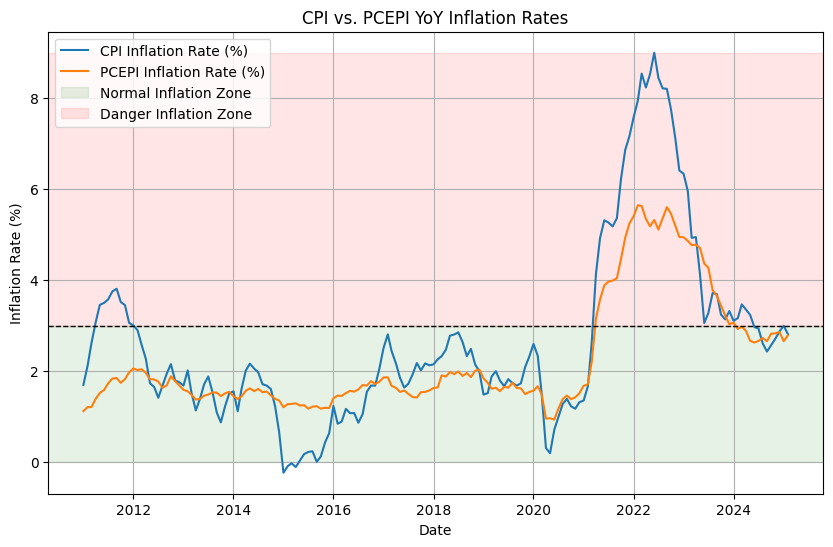

In [38]:
# Calculate monthly % change
df['cpi_pct_change'] = df['value_cpi'].pct_change(periods=12) * 100
df['pcepi_pct_change'] = df['value_pcepi'].pct_change(periods=12) *100

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['cpi_pct_change'], label='CPI Inflation Rate (%)')
plt.plot(df['date'], df['pcepi_pct_change'], label='PCEPI Inflation Rate (%)')

#shade the part where we have minor inflation(<3%) and heavy inflation(>3%)
plt.axhspan(0,3,color ='green',alpha = 0.1, label = 'Normal Inflation Zone')
plt.axhspan(3, df['cpi_pct_change'].max(), color = 'red',alpha = 0.1, label = 'Danger Inflation Zone')
plt.axhline(y=3, color='black', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('CPI vs. PCEPI YoY Inflation Rates')
plt.legend()
plt.grid(True)
plt.show()

CPI - Consumer Price Index is a measure of average change over time in prices paid by consumers for a baskets of goods and services. It's used to determined the inflation rate, which is the percentage change in increasing prices over time. On the other hand, PCEPI is a measure of the prices that people living in the United States pay for good and services. 

In figure one, we can clearly see that CPI are always higher than PCEPI but it's not because of pure inflation difference. There are several different reasons that can explain this. First, they have different base years and also basket and weights. CPI focus on capturing what urban consumers buy while PCEPI includes healthcare paid by employers or governments which end up with a broader spending basket. Because of that, PCEPI tends to growth more slowly because it adjusts for how consumers substitute cheaper goods.

Inflation tends to happen when PCE and CPI spike up. When we see both inflation rates spikes together like in 2022, post-Covid year when the economy was slow, supply chain shocked and havbing a global energy issued, the real inflation happens. For the rest of the time, small fluctuations happen when the inflation rate goes up and down by 1-2% move. It's completely normal and healthy for the economy in long run. Small, steady inflation can be beneficial for an economy as it can incentivize spending and investment, leading to economic growth and job creation. It also provides a cushion against deflation and allows central banks to use interest rate adjustments to manage the economy more effectively. 

According to the graph above, from 2010 to 2024, we have only felt in to danger zone where the inflation rate was larger than 5%, once. And again, it was the covid year. For years, we have been doing a great job to keep the inflation under the radar, exactly where we want it to be. 

In [39]:
output_path = '/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/merge_df_cleaned.csv'
df.to_csv(output_path, index = False)